In [1]:
%pwd

'C:\\Users\\Deepak'

In [2]:
#Project to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

In [3]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
cd/Users/Deepak/Downloads/soccer

C:\Users\Deepak\Downloads\soccer


In [5]:
pwd

'C:\\Users\\Deepak\\Downloads\\soccer'

In [6]:
#readind data from sqlite database

In [7]:
conn = sqlite3.connect('database.sqlite')

In [71]:
df = pd.read_sql_query("select * from Player_Attributes",conn)

In [72]:
df.shape

(183978, 42)

In [73]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [74]:
#exploratory data analysis

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [76]:
df['overall_rating'].count()

183142

In [77]:
df['overall_rating'].nunique()

61

In [78]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [79]:
#filtering out the categorical columns

In [80]:
df[df.columns[df.dtypes == 'object']].head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate
0,2016-02-18 00:00:00,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium


In [81]:
df_cat = df[df.columns[df.dtypes == 'object']]

In [82]:
#first impute the categorical missing values and then encode

In [83]:
df_cat['preferred_foot'].unique()

array(['right', 'left', None], dtype=object)

In [84]:
#Imputing the categorical variables
from sklearn.impute import SimpleImputer

In [85]:
imp = SimpleImputer(missing_values = 'NaN', strategy = 'most_frequent')

In [86]:
imp_preferred_foot = imp.fit_transform(df_cat[['preferred_foot']].astype(str))

In [87]:
imp_preferred_foot.shape

(183978, 1)

In [88]:
imp_attack_work_rate = imp.fit_transform(df_cat[['attacking_work_rate']].astype(str))

In [89]:
imp_attack_work_rate.shape

(183978, 1)

In [90]:
imp_defense_work_rate = imp.fit_transform(df_cat[['defensive_work_rate']].astype(str))

In [91]:
imp_defense_work_rate.shape

(183978, 1)

In [93]:
df_cat['imp_preferred_foot'] = imp_preferred_foot

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_cat['imp_attack_work_rate'] = imp_attack_work_rate

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_cat['imp_defense_work_rate'] = imp_defense_work_rate

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
df_cat.head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate,imp_preferred_foot,imp_attack_work_rate,imp_defense_work_rate
0,2016-02-18 00:00:00,right,medium,medium,right,medium,medium
1,2015-11-19 00:00:00,right,medium,medium,right,medium,medium
2,2015-09-21 00:00:00,right,medium,medium,right,medium,medium
3,2015-03-20 00:00:00,right,medium,medium,right,medium,medium
4,2007-02-22 00:00:00,right,medium,medium,right,medium,medium


In [97]:
#convert the object to categorical encoder

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
lb_en = LabelEncoder()

In [100]:
df_cat["preferred_foot_en"] = lb_en.fit_transform(df_cat["imp_preferred_foot"])

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
df_cat.head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate,imp_preferred_foot,imp_attack_work_rate,imp_defense_work_rate,preferred_foot_en
0,2016-02-18 00:00:00,right,medium,medium,right,medium,medium,2
1,2015-11-19 00:00:00,right,medium,medium,right,medium,medium,2
2,2015-09-21 00:00:00,right,medium,medium,right,medium,medium,2
3,2015-03-20 00:00:00,right,medium,medium,right,medium,medium,2
4,2007-02-22 00:00:00,right,medium,medium,right,medium,medium,2


In [102]:
#imputing all categorical variables

In [103]:
df_cat["attack_workrate_en"] = lb_en.fit_transform(df_cat["imp_attack_work_rate"])

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_cat["defense_workrate_en"] = lb_en.fit_transform(df_cat["imp_defense_work_rate"])

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_cat.head()

,date,preferred_foot,attacking_work_rate,defensive_work_rate,imp_preferred_foot,imp_attack_work_rate,imp_defense_work_rate,preferred_foot_en,attack_workrate_en,defense_workrate_en
0,2016-02-18 00:00:00,right,medium,medium,right,medium,medium,2,4,16
1,2015-11-19 00:00:00,right,medium,medium,right,medium,medium,2,4,16
2,2015-09-21 00:00:00,right,medium,medium,right,medium,medium,2,4,16
3,2015-03-20 00:00:00,right,medium,medium,right,medium,medium,2,4,16
4,2007-02-22 00:00:00,right,medium,medium,right,medium,medium,2,4,16


In [106]:
#dropping the original variables and retaining the imputed variables

In [107]:
df_cat.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'], axis = 1, inplace = True)

C:\Users\Deepak\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
df_cat.head()

,date,imp_preferred_foot,imp_attack_work_rate,imp_defense_work_rate,preferred_foot_en,attack_workrate_en,defense_workrate_en
0,2016-02-18 00:00:00,right,medium,medium,2,4,16
1,2015-11-19 00:00:00,right,medium,medium,2,4,16
2,2015-09-21 00:00:00,right,medium,medium,2,4,16
3,2015-03-20 00:00:00,right,medium,medium,2,4,16
4,2007-02-22 00:00:00,right,medium,medium,2,4,16


In [109]:
#converting date variable
df_cat['date'] = pd.to_datetime(df_cat.date)

C:\Users\Deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [110]:
#dropping the imputed columns and retaining the encoded columns

In [111]:
df_cat.drop(['imp_defense_work_rate','imp_preferred_foot','imp_attack_work_rate'],axis = 1, inplace = True)

In [112]:
df_cat.head()

,date,preferred_foot_en,attack_workrate_en,defense_workrate_en
0,2016-02-18,2,4,16
1,2015-11-19,2,4,16
2,2015-09-21,2,4,16
3,2015-03-20,2,4,16
4,2007-02-22,2,4,16


In [113]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [114]:
df.drop(['date','preferred_foot','attacking_work_rate','defensive_work_rate'], axis = 1,inplace = True)

In [115]:
df_cat.head()

,date,preferred_foot_en,attack_workrate_en,defense_workrate_en
0,2016-02-18,2,4,16
1,2015-11-19,2,4,16
2,2015-09-21,2,4,16
3,2015-03-20,2,4,16
4,2007-02-22,2,4,16


In [116]:
df.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [117]:
#impute the numerical values
#standardize the numerical values
#merge all the sub sets

In [118]:
#Impute the numerical values

In [141]:
import numpy as np

In [146]:
df_num = df[df.columns[df.dtypes == np.number]]

In [119]:
impute = SimpleImputer(strategy = 'mean')

In [148]:
df1 = df_num

In [149]:
impute.fit(df1)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [150]:
impute.statistics_

array([68.60001529, 73.46035317, 55.0868834 , 49.92107763, 57.26602309,
       62.42967206, 49.46843572, 59.17515371, 52.96567456, 49.3809503 ,
       57.0698802 , 63.38887858, 67.65935722, 68.05124439, 65.97090999,
       66.10370641, 65.18949604, 61.80842734, 66.96904532, 67.03854386,
       67.42452851, 53.33943061, 60.94804578, 52.00927149, 55.78650446,
       57.87354978, 55.00398598, 46.7722423 , 50.35125749, 48.00146195,
       14.70439331, 16.06361184, 20.99836193, 16.13215428, 16.44143888])

In [151]:
df2 = impute.transform(df1)

In [152]:
df_imp = pd.DataFrame(df2, columns = df1.columns)

In [153]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 35 columns):
overall_rating        183978 non-null float64
potential             183978 non-null float64
crossing              183978 non-null float64
finishing             183978 non-null float64
heading_accuracy      183978 non-null float64
short_passing         183978 non-null float64
volleys               183978 non-null float64
dribbling             183978 non-null float64
curve                 183978 non-null float64
free_kick_accuracy    183978 non-null float64
long_passing          183978 non-null float64
ball_control          183978 non-null float64
acceleration          183978 non-null float64
sprint_speed          183978 non-null float64
agility               183978 non-null float64
reactions             183978 non-null float64
balance               183978 non-null float64
shot_power            183978 non-null float64
jumping               183978 non-null float64
stamina        

In [168]:
df_imp.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [170]:
#merge categorical data set with numerical data set

In [187]:
df_ = [df_imp, df_cat]

In [208]:
df_all = pd.concat(df_, sort=False, axis = 1)

In [209]:
df_all.shape

(183978, 39)

In [210]:
df_all.drop(['date'], axis = 1, inplace = True)

In [213]:
df_all.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_foot_en',
       'attack_workrate_en', 'defense_workrate_en'],
      dtype='object')

In [206]:
#separate target variable

In [214]:
features = df_all.columns[1:]

In [215]:
target = df_all.columns[0]

In [216]:
X = df_all[features]

In [217]:
Y = df_all[target]

In [218]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_en,attack_workrate_en,defense_workrate_en
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2,4,16
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2,4,16
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2,4,16
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2,4,16
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2,4,16


In [219]:
Y.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [221]:
#split train and test data
#run the linear model
#test the score 
#run decision tree model
#test the score
#run IV test for variable selection

In [233]:
#multicollinearity check 
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline

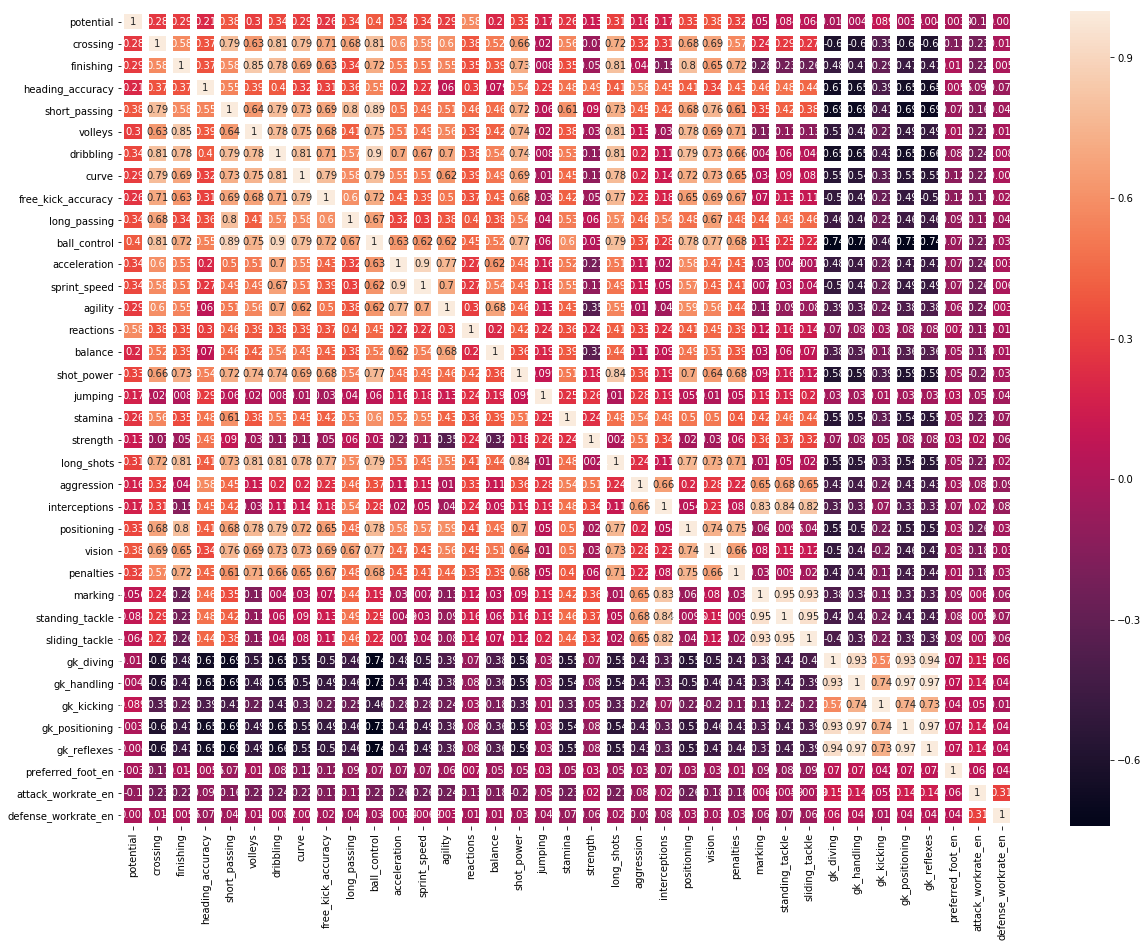

In [232]:
plt.subplots(figsize=(20,15))
sb.heatmap(X.corr(), annot = True, linewidths = 6, fmt= '.2g')
plt.show()

In [303]:
"""From the above check it is analysed that gk_diving, gk_handling, gk_positioning, gk_reflexes are highly coorelated.
Also marking, standing_tackle, sliding_tackle are also highly coorelated to each other."""

'From the above check it is analysed that gk_diving, gk_handling, gk_positioning, gk_reflexes are highly coorelated.\nAlso marking, standing_tackle, sliding_tackle are also highly coorelated to each other.'

In [236]:
#split train and test data

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [238]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [248]:
X_train.shape

(137983, 37)

In [243]:
Y_train.shape

(137983,)

In [249]:
lm= LinearRegression()

In [250]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
#printing the slope and intercept of the linear equation
lm.intercept_

-3.0215636379191295

In [259]:
lm.coef_
cdf= pd.DataFrame(lm.coef_,X.columns, columns= ['Coeff'])
cdf

,Coeff
potential,0.379189
crossing,0.021082
finishing,0.012381
heading_accuracy,0.068872
short_passing,0.050473
volleys,0.002949
dribbling,-0.011727
curve,0.011219
free_kick_accuracy,0.013377
long_passing,0.006547


In [260]:
#predicting the values

In [262]:
predict = lm.predict(X_test)

C:\Users\Deepak\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


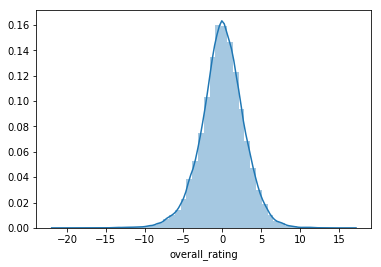

In [269]:
#plotting the residual errors
sb.distplot((Y_test - predict))

In [270]:
#testing the score of the test
lm.score(X_test,Y_test)

0.8418890222768154

In [312]:
#some metrics to measure accuracy of the forecast
from sklearn import metrics
print('MAE', metrics.mean_absolute_error (Y_test, predict))
print('MSE', metrics.mean_squared_error (Y_test, predict))
print('RSME',np.sqrt(metrics.mean_squared_error (Y_test, predict)) )
metrics.explained_variance_score (Y_test, predict)

MAE 2.1358850218113705
MSE 7.813737146780823
RSME 2.7953062706581586


0.8418898363798604

In [308]:
#Running the model with decision Tree  regeressor and evaluate both the model score

In [297]:
from sklearn.tree import DecisionTreeRegressor

In [298]:
tree = DecisionTreeRegressor()

In [299]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [302]:
tree.score(X_test,Y_test)

0.9623880744021056

In [305]:
#The score for linear model is 84.2% and the score for the decision tree regressor  model is 96.2%

In [310]:
predict_tree = tree.predict(X_test)

In [313]:
print('MAE', metrics.mean_absolute_error (Y_test, predict_tree))
print('MSE', metrics.mean_squared_error (Y_test, predict_tree))
print('RSME',np.sqrt(metrics.mean_squared_error (Y_test, predict_tree)) )
metrics.explained_variance_score (Y_test, predict_tree)

MAE 0.5954771222544929
MSE 1.8587558209952821
RSME 1.3633619552397969


0.962394318543196